In [2]:
import requests
import json
import pandas as pd

# Consumindo API do IBGE
### https://servicodados.ibge.gov.br/api/docs/localidades

# Distritos 
#### (Obtém o conjunto de distritos do Brasil)

In [19]:
r_distros = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/distritos').json()
r_distros[0]

{'id': '520005005',
 'nome': 'Abadia de Goiás',
 'municipio': {'id': '5200050',
  'nome': 'Abadia de Goiás',
  'microrregiao': {'id': 52010,
   'nome': 'Goiânia',
   'mesorregiao': {'id': 5203,
    'nome': 'Centro Goiano',
    'UF': {'id': 52,
     'sigla': 'GO',
     'nome': 'Goiás',
     'regiao': {'id': 5, 'sigla': 'CO', 'nome': 'Centro-Oeste'}}}},
  'regiao-imediata': {'id': 520001,
   'nome': 'Goiânia',
   'regiao-intermediaria': {'id': 5201,
    'nome': 'Goiânia',
    'UF': {'id': 52,
     'sigla': 'GO',
     'nome': 'Goiás',
     'regiao': {'id': 5, 'sigla': 'CO', 'nome': 'Centro-Oeste'}}}}}}

# Verificando as chaves

In [35]:
r_distros[0].keys()

dict_keys(['id', 'nome', 'municipio'])

In [4]:
r_distros[0]['municipio'].keys()

dict_keys(['id', 'nome', 'microrregiao', 'regiao-imediata'])

# Filtrando os registros

In [18]:
r_distros[0]['municipio']['id']
r_distros[0]['municipio']['nome']
r_distros[0]['municipio']['regiao-imediata']['id']
r_distros[0]['municipio']['regiao-imediata']['nome']
r_distros[0]['municipio']['regiao-imediata']['regiao-intermediaria']['id']
r_distros[0]['municipio']['regiao-imediata']['regiao-intermediaria']['nome']
r_distros[0]['municipio']['regiao-imediata']['regiao-intermediaria']['UF']['id']
r_distros[0]['municipio']['regiao-imediata']['regiao-intermediaria']['UF']['sigla']
r_distros[0]['municipio']['regiao-imediata']['regiao-intermediaria']['UF']['nome']
r_distros[0]['municipio']['regiao-imediata']['regiao-intermediaria']['UF']['regiao']['id']
r_distros[0]['municipio']['regiao-imediata']['regiao-intermediaria']['UF']['regiao']['sigla']
r_distros[0]['municipio']['regiao-imediata']['regiao-intermediaria']['UF']['regiao']['nome']

'Centro-Oeste'

In [7]:
r_distros[0].keys()

dict_keys(['id', 'nome', 'municipio'])

# Criando função para transformar em dataframe

In [27]:
def GeraDfDistro(r_json):
    _id = []; 
    _nome =[] ; 
    _municipio_id = [] ;
    _municipio_nome = [];
    _microrregiao_municipio_id = [];
    _microrregiao_municipio_nome = [];
    _regiao_imediata_id = [];
    _regiao_imediata_nome = [] ;
    _uf_id = [];
    _uf_sigla = [] ;
    _uf_nome = [] ;
    _regiao_id = [];
    _regiao_sigla = []; 
    _regiao_nome = [];

    for idx in range(len(r_json)):
        _id.append(r_json[idx]['id'])
        _nome.append(r_json[idx]['nome'])
        
        _municipio_id.append(r_distros[idx]['municipio']['id'])
        _municipio_nome.append(r_distros[idx]['municipio']['nome'])
                             
        _microrregiao_municipio_id.append(r_distros[idx]['municipio']['regiao-imediata']['id'])
        _microrregiao_municipio_nome.append(r_distros[idx]['municipio']['regiao-imediata']['nome'])
                             
        _regiao_imediata_id.append(r_distros[idx]['municipio']['regiao-imediata']['regiao-intermediaria']['id'])
        _regiao_imediata_nome.append(r_distros[idx]['municipio']['regiao-imediata']['regiao-intermediaria']['nome'])
                             
        _uf_id.append(r_distros[idx]['municipio']['regiao-imediata']['regiao-intermediaria']['UF']['id'])
        _uf_sigla.append(r_distros[idx]['municipio']['regiao-imediata']['regiao-intermediaria']['UF']['sigla'])
        _uf_nome.append(r_distros[idx]['municipio']['regiao-imediata']['regiao-intermediaria']['UF']['nome'])
                             
        _regiao_id.append(r_distros[idx]['municipio']['regiao-imediata']['regiao-intermediaria']['UF']['regiao']['id'])
        _regiao_sigla.append(r_distros[idx]['municipio']['regiao-imediata']['regiao-intermediaria']['UF']['regiao']['sigla'])
        _regiao_nome.append(r_distros[idx]['municipio']['regiao-imediata']['regiao-intermediaria']['UF']['regiao']['nome'])
    
    df = pd.DataFrame({
        "id" : _id,
        "nome" : _nome,
        "municipio_id" : _municipio_id,
        "municipio_nome" : _municipio_nome,
        "microrregiao_municipio_id" : _microrregiao_municipio_id,
        "microrregiao_municipio_nome" : _microrregiao_municipio_nome,
        "regiao_imediata_id" : _regiao_imediata_id,
        "regiao_imediata_nome" : _regiao_imediata_nome,
        "uf_id" : _uf_id,
        "uf_sigla" : _uf_sigla,
        "uf_nome" : _uf_nome,
        "regiao_id" : _regiao_id,
        "regiao_sigla" : _regiao_sigla,
        "regiao_nome" : _regiao_nome
    })
    return df

# Testando

In [28]:
df_distro = GeraDfDistro(r_distros)
df_distro

,id,nome,municipio_id,municipio_nome,microrregiao_municipio_id,microrregiao_municipio_nome,regiao_imediata_id,regiao_imediata_nome,uf_id,uf_sigla,uf_nome,regiao_id,regiao_sigla,regiao_nome
0,520005005,Abadia de Goiás,5200050,Abadia de Goiás,520001,Goiânia,5201,Goiânia,52,GO,Goiás,5,CO,Centro-Oeste
1,310010405,Abadia dos Dourados,3100104,Abadia dos Dourados,310061,Monte Carmelo,3111,Uberlândia,31,MG,Minas Gerais,3,SE,Sudeste
2,520010005,Abadiânia,5200100,Abadiânia,520002,Anápolis,5201,Goiânia,52,GO,Goiás,5,CO,Centro-Oeste
3,520010010,Posse d'Abadia,5200100,Abadiânia,520002,Anápolis,5201,Goiânia,52,GO,Goiás,5,CO,Centro-Oeste
4,310020305,Abaeté,3100203,Abaeté,310070,Abaeté,3113,Divinópolis,31,MG,Minas Gerais,3,SE,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,293360415,Iguira,2933604,Xique-Xique,290021,Xique-Xique - Barra,2907,Irecê,29,BA,Bahia,2,NE,Nordeste
10645,251740705,Zabelê,2517407,Zabelê,250007,Monteiro,2502,Campina Grande,25,PB,Paraíba,2,NE,Nordeste
10646,355715405,Zacarias,3557154,Zacarias,350023,Birigui - Penápolis,3506,Araçatuba,35,SP,São Paulo,3,SE,Sudeste
10647,211400705,Zé Doca,2114007,Zé Doca,210009,Santa Inês,2102,Santa Inês - Bacabal,21,MA,Maranhão,2,NE,Nordeste


# Verficando as colunas e os typos do dataframe

In [32]:
df_distro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10649 entries, 0 to 10648
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           10649 non-null  object
 1   nome                         10649 non-null  object
 2   municipio_id                 10649 non-null  object
 3   municipio_nome               10649 non-null  object
 4   microrregiao_municipio_id    10649 non-null  int64 
 5   microrregiao_municipio_nome  10649 non-null  object
 6   regiao_imediata_id           10649 non-null  int64 
 7   regiao_imediata_nome         10649 non-null  object
 8   uf_id                        10649 non-null  int64 
 9   uf_sigla                     10649 non-null  object
 10  uf_nome                      10649 non-null  object
 11  regiao_id                    10649 non-null  int64 
 12  regiao_sigla                 10649 non-null  object
 13  regiao_nome                  10

# Verificando a distribuição por região

<AxesSubplot:>

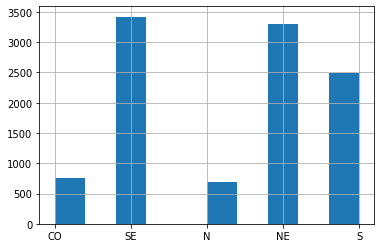

In [31]:
df_distro['regiao_sigla'].hist()

# Gravando registros em csv

In [33]:
df_distro.to_csv('ibge_localidades.csv')